# Final Project--Breast Cancer data Analysing

Cancer begins with uncontrolled division of one cell, which results in a visible mass named tumor. Tumor can be benign or malignant. Breast cancer is the second leading cause of death for women all over the world and more than women will suffer this disease during their lifetime. It is possible for a tumor to be benign or cancerous. And breast cancer is the second leading cause of death for women all over the world and more than 8{\%} women will suffer from this disease during their lifetime. I am going to implement two classification methods to predict breast-cancer and see the accuracy of my models. The data I am going to use comes from UCI Machine Learning Repository.Links as follow: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
The original data comes from Dr. WIlliam H. Wolberg (physician),University of Wisconsin Hospitals,Madison, Wisconsin, USA. 

## Decision Tree

The first method we are going to implement is decision tree which is one of the most straight forward machine learning methods. Like it's name, decision tree will generate "nodes" and "leaves" based on the information given. The goal of decision tree is to generate a "tree" that can provide classification from top node to end leaf. 

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from IPython.display import Image

In [334]:

#Use itable function to show the data and search the date.

df = pd.read_csv("breast_cancer.csv", index_col=0)
from itables import show
show(df)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:,"(2 for benign, 4 for malignant)"
Sample code number,,,,,,,,,,,


First we need to set up the input data set and the target data set. The target is the attribution 'Class'
in the data set, our goal is to process the input and get the output with correct 
classification. Besides, the attribution 'Bare Nuclei' has 'NaN' value and we need to 
modify it into integer, here average value replaces the 'NaN' values.

In [335]:
inputs = df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
            'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
targets = df['Class:']
inputs.shape
df['Bare Nuclei'].fillna(round(df['Bare Nuclei'].mean()), inplace=True)
df.drop(columns = ['(2 for benign, 4 for malignant)'],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  699 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class:                       699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.1 KB


In [336]:
#Seperate the data set 80% as training set and the rest 20% as testing set.
import sklearn.model_selection as train_group
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_group.train_test_split(X, y, train_size= 0.8 ,test_size=0.2, random_state=42)
y_train = np.array(y_train).reshape(559,1)
y_test = np.array(y_test).reshape(140,1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559, 1)
(140, 1)


In [337]:
features = list(x_train.columns[:9])
y = y_train
x = x_train[features]
print("* features:", features, sep="\n")
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(x, y)

* features:
['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


DecisionTreeClassifier(min_samples_split=20, random_state=99)

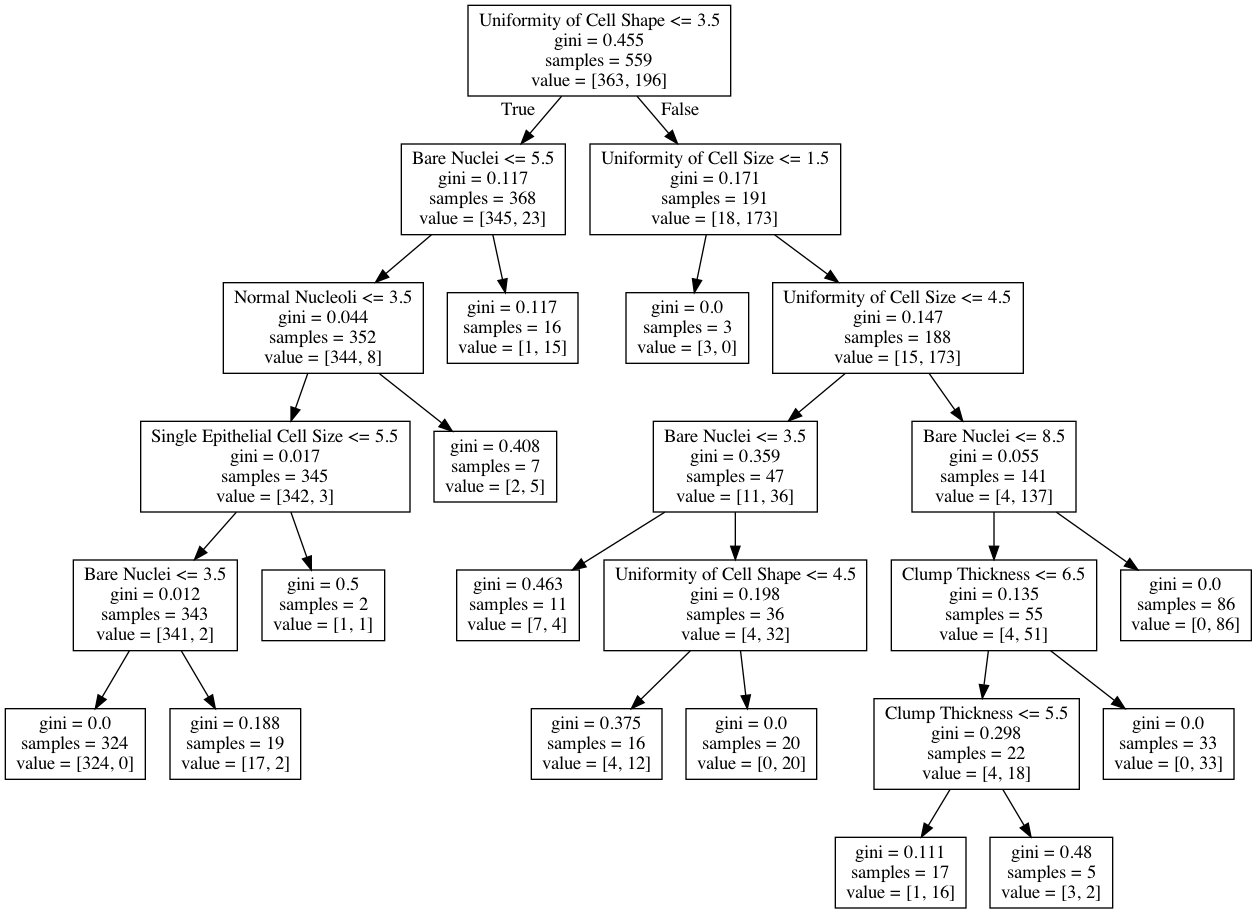

In [338]:
data = export_graphviz(dt, out_file=None,
                        feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

After applying the Decision-Tree function, we have a unpruned decision tree as shown. From this tree, we can start from top node and follow all the branches and finally reach the bottom leaf. We also get two test scores, train test score and test test score. 

In [339]:
y_predict = dt.predict(x_test)
print('train score',dt.score(x_train,y_train))
print('test score',dt.score(x_test,y_test))
print(confusion_matrix(y_predict,y_test))
print(classification_report(y_predict,y_test,target_names=['malignant','benign']))

train score 0.9695885509838998
test score 0.9214285714285714
[[90  6]
 [ 5 39]]
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        96
      benign       0.87      0.89      0.88        44

    accuracy                           0.92       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



One important thing of decision tree is to prune to tree in case of overfitting. Base on the tree model we have, we try to find out the best tree size that we are going to prune to. First, we have the Accuracy VS. Tree size Graph. From the graph, we can see test score get the maxium number at tree size of 5. Next, we plot the misclassification VS. Tree size graph and from the graph we can see the misclassification reach the lowest at tree size of 5. So far, the two graph shows us that tree size of 5 is the best option for our model.

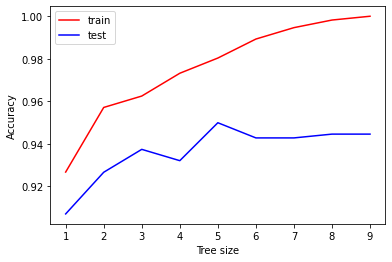

In [340]:
test_score = []
train_score = []
for i in range(1,10):
    dt = DecisionTreeClassifier(random_state=99,max_depth=i)
    dt = dt.fit(x_train,y_train)
    mean_score = cross_val_score(dt,x,y,cv=10).mean()
    train_score.append(dt.score(x_train,y_train))
    test_score.append(mean_score)
plt.plot(range(1,10),train_score,'red',label='train')
plt.legend()
plt.plot(range(1,10),test_score,'blue',label='test')
plt.legend()
plt.xlabel('Tree size')
plt.ylabel('Accuracy')
plt.xticks(range(1,10))
plt.show()

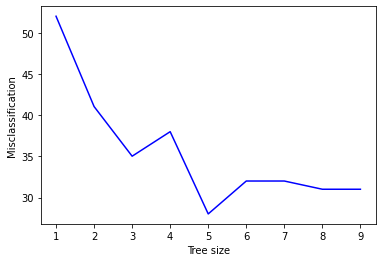

In [341]:
misclass = []
for i in range(1,10):
    dt = DecisionTreeClassifier(random_state=99,max_depth=i)
    mean_score = cross_val_score(dt,x,y,cv=10).mean()
    class_ = len(y)*(1-mean_score)
    misclass.append(class_)
plt.plot(range(1,10),misclass,'blue')
plt.xlabel('Tree size')
plt.ylabel('Misclassification')
plt.xticks(range(1,10))
plt.show()

Base on the information from the two graph, now we implement the Decision tree classifier function to prune the tree into 5 layers. 

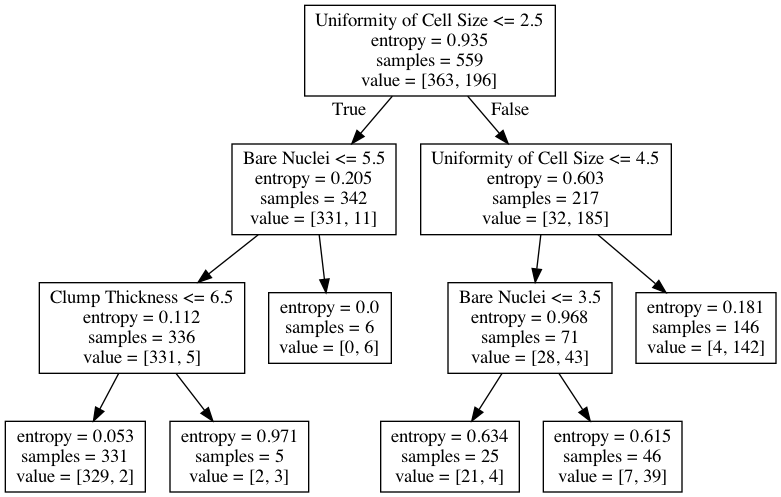

In [342]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_leaf_nodes=6)
dt.fit(x,y)
data = export_graphviz(dt, out_file=None,
                        feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [343]:
y_predict = dt.predict(x_test)
print('train score',dt.score(x_train,y_train))
print('test score',dt.score(x_test,y_test))
print(confusion_matrix(y_predict,y_test))
print(classification_report(y_predict,y_test,target_names=['malignant','benign']))

train score 0.9660107334525939
test score 0.9428571428571428
[[93  6]
 [ 2 39]]
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        99
      benign       0.87      0.95      0.91        41

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140



Succesfully, we have pruned the tree down to only 5 layers. With the new modified model, we test again and get a better result compared to the unpruned tree model. (94.29% from pruned tree, 92.14% from the unpruned tree.Here we can say the dicision tree model is completed.

## Logistic Regression
The algorithm in Logistic Regression is using sigmoid function. Using sigmoid function, results from linear regression function can be transformed into 1 and 0 which classify the result into two different outputs. For each calculating epoch, we use gradient decent to minimize the cost function and to get the optimal value.


In [344]:
inputs = df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
            'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
targets = df['Class:']
inputs.shape
df['Bare Nuclei'].fillna(round(df['Bare Nuclei'].mean()), inplace=True)

In [345]:
#Replacing 2,4 with 0,1 from original data since sigmoid function would only take 0 and 1 as result.
df['Class:'].replace([2,4], [0,1], inplace=True)
#Splite data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    inputs, targets, test_size = 0.2, random_state = 42)
  
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

The algorithm of logistic regression is more complicated then decision tree so that I decide to use function block to accomplish our goal.

In [346]:
def initialWB(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [347]:
def sigmoid(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [348]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    final_result = sigmoid(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [349]:
def gradient_cost(w, b, X, Y, learning_rate, no_iterations):
    cost_list = []
    index = []
    for i in range(no_iterations):
        
        grads, cost = model_optimize(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        #weight and bias update with gradient
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if i % 100 == 0:
            cost_list.append(cost)
            index.append(i)
            print ("Cost after iteration % i: % f" %(i, cost))
    #final output of coefficients w,b. 
    coeff = {"w": w, "b": b}
    #show the graph of "Cost" VS "Number of iteration".   
    plt.plot(index, cost_list)
    plt.xticks(index, rotation ='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return coeff, index, cost_list

In [350]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
    # if y_pred is bigger than 0.5, our prediction is sign one (y_head = 1),
    # if y_pred is smaller than 0.5, our prediction is sign zero (y_head = 0),
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    print((y_pred+1)*2)
    return y_pred

In [351]:
def accuracy_score(y_predict,y_test):
    
    score = 100 - np.mean(np.abs(y_predict - y_test)) * 100
    
    return score

In [352]:
def Logistic_Regression(x_train, y_train, x_test, y_test, learning_rate,epoch):
    n_features = x_train.shape[1]
    print('Number of Features', n_features)
    w, b = initialWB(n_features)

    coeff, index, costs = gradient_cost(w, b, x_train, y_train, learning_rate,epoch)

    w = coeff["w"]
    b = coeff["b"]
    print('Optimized weights', w)
    print('Optimized intercept',b)

    final_train_pred = sigmoid(np.dot(w,x_train.T)+b)
    final_test_pred = sigmoid(np.dot(w,x_test.T)+b)

    m_train =  x_train.shape[0]
    m_test =  x_test.shape[0]

    y_tr_pred = predict(final_train_pred, m_train)
    print('Training Accuracy with epoch of',epoch,'is',accuracy_score(y_tr_pred.T, y_train))
    y_train = (y_train.transpose()+1)*2
    print(y_train.astype('float64'))
    y_ts_pred = predict(final_test_pred, m_test)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, y_test))
    y_test = (y_test.transpose()+1)*2
    print(y_test.astype('float64'))
    return index, costs

Number of Features 9
Cost after iteration  0:  0.693147
Cost after iteration  100:  0.275542
Cost after iteration  200:  0.222683
Cost after iteration  300:  0.191377
Cost after iteration  400:  0.170479
Cost after iteration  500:  0.155656
Cost after iteration  600:  0.144673
Cost after iteration  700:  0.136250
Cost after iteration  800:  0.129612
Cost after iteration  900:  0.124261
Cost after iteration  1000:  0.119867
Cost after iteration  1100:  0.116203
Cost after iteration  1200:  0.113107
Cost after iteration  1300:  0.110460
Cost after iteration  1400:  0.108176
Cost after iteration  1500:  0.106188
Cost after iteration  1600:  0.104445
Cost after iteration  1700:  0.102906
Cost after iteration  1800:  0.101539
Cost after iteration  1900:  0.100318


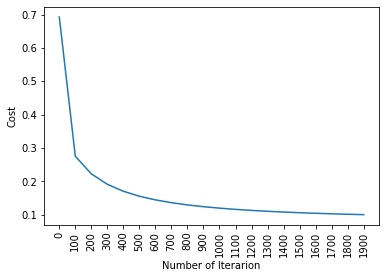

Optimized weights [[2.44913364e-01 1.79337215e-01 3.07784143e-01 1.04349252e-01
  3.58880845e-04 3.81201456e-01 1.48684221e-01 3.11013169e-02
  1.53495682e-01]]
Optimized intercept -5.994413366210964
[[2. 2. 2. 2. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 2. 2. 2. 2. 4. 2. 4.
  2. 2. 4. 2. 4. 2. 2. 2. 4. 4. 2. 2. 4. 4. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 4. 4.
  2. 2. 4. 4. 2. 2. 4. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 2. 4. 2. 2. 4. 2. 2.
  2. 2. 2. 2. 4. 2. 2. 4. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4.
  4. 2. 2. 2. 2. 4. 2. 4. 4. 2. 4. 4. 2. 4. 4. 2. 4. 4. 2. 4. 2. 2. 2. 4.
  4. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4.
  4. 4. 4. 4. 2. 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4.
  2. 2. 4. 2. 2. 2. 4. 4. 2. 4. 2. 2. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2.
  4. 2. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 4. 4. 4. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 2. 4. 2. 2. 4

In [353]:
index_1, costs_1 = Logistic_Regression(x_train, y_train, 
                                       x_test, y_test, learning_rate = 0.1,epoch = 2000)

From the result we can see our model is very well trained and efficiently. The accuracy of test is 97.14% which is higher then the accuracy from the dicision tree. The cost VS. Number of iteration graph tells us the model has reach its optimal value where the cost line become flat and close to 0. 

Through this project I learn different methods for classification as well as the optimalization. So far, both models can provide a very high and accurate result identifying the tumor. We can say the project is completed perfectly.